In [ ]:
# importamos la librería de google drive
from google.colab import drive


In [ ]:
#cargamos el drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Especificar nombres de columnas
column_names = ["ID", "Name", "Phone Number", "Message", "Date Time", "Received", "Sent", "Status"]

# Cargar el archivo CSV saltando las primeras 4 filas y usando los nombres de columna especificados
datos = pd.read_csv('/content/drive/My Drive/sms.csv',  names=column_names)

# Eliminar duplicados
df = datos.drop_duplicates()

# Mostrar las primeras filas del DataFrame sin duplicados
df.head()



,ID,Name,Phone Number,Message,Date Time,Received,Sent,Status
ID,Name,Phone Number,Message,Date Time,Received,Sent,Status,NaN
164,NaN,+573003473220,-,-,-,-,-,NaN
653013073086092032,NaN,NaN,Received,2021-09-10 19:31:13,La persona a la que llamo al celular+573003473...,NaN,NaN,NaN
669467917373976960,NaN,NaN,Received,2022-03-20 06:18:37,La persona a la que llamo al celular+573003473...,NaN,NaN,NaN
232,NaN,+573003585805,-,-,-,-,-,NaN


In [ ]:
#imprimimos el dataset para ver los datos que hay dentro.
df

,ID,Name,Phone Number,Message,Date Time,Received,Sent,Status
ID,Name,Phone Number,Message,Date Time,Received,Sent,Status,NaN
164,NaN,+573003473220,-,-,-,-,-,NaN
653013073086092032,NaN,NaN,Received,2021-09-10 19:31:13,La persona a la que llamo al celular+573003473...,NaN,NaN,NaN
669467917373976960,NaN,NaN,Received,2022-03-20 06:18:37,La persona a la que llamo al celular+573003473...,NaN,NaN,NaN
232,NaN,+573003585805,-,-,-,-,-,NaN
...,...,...,...,...,...,...,...,...
701986463811283968,NaN,NaN,Received,2023-03-31 15:14:23,"Esta es Stormy Daniels, la actriz porno por la...",NaN,NaN,NaN
702250575747956992,NaN,NaN,Received,2023-04-03 16:36:15,Desgarrador reclamo de madre de militar asesin...,NaN,NaN,NaN
153,NaN,zkgg7536@bk.ru,-,-,-,-,-,NaN
672418873627433344,NaN,NaN,Received,2022-04-23 10:01:13,"Hola, soy el gerente de contratación de la emp...",NaN,NaN,NaN


Etiqueta
0    5863
1     102
Name: count, dtype: int64
Etiqueta
1    102
0    102
Name: count, dtype: int64
Resultados del modelo Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.82      0.97      0.89        32

    accuracy                           0.87        62
   macro avg       0.89      0.87      0.87        62
weighted avg       0.88      0.87      0.87        62

Accuracy: 0.8709677419354839


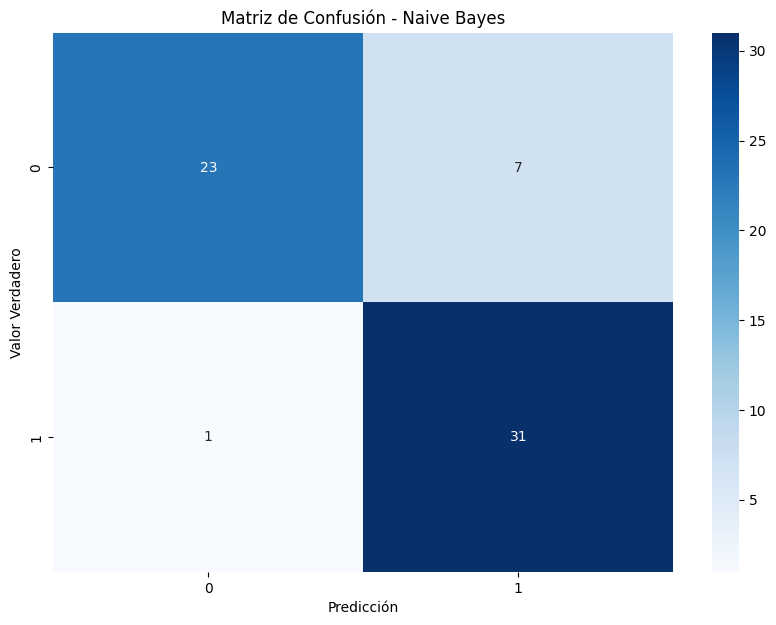

Resultados del modelo Random Forest:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.88      0.93        32

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62

Accuracy: 0.9354838709677419


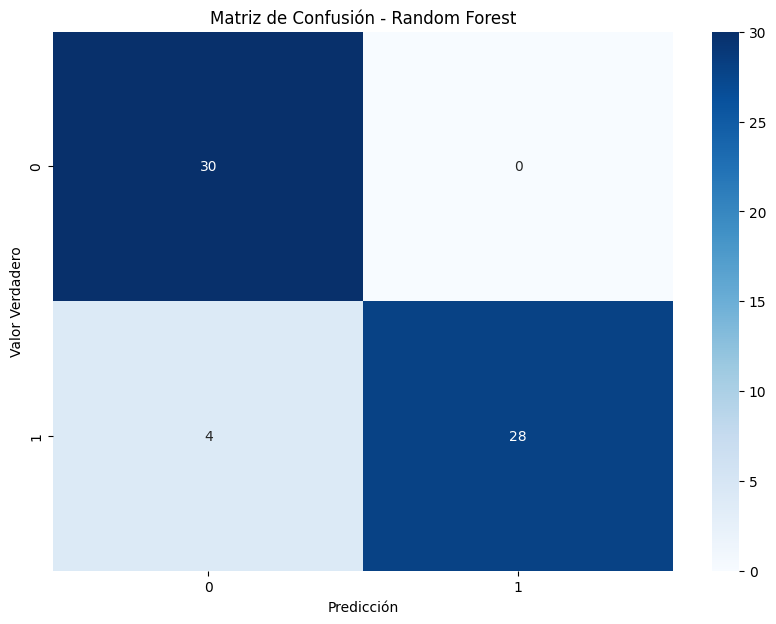

Resultados del modelo Red Neuronal:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        30
           1       0.96      0.84      0.90        32

    accuracy                           0.90        62
   macro avg       0.91      0.91      0.90        62
weighted avg       0.91      0.90      0.90        62

Accuracy: 0.9032258064516129


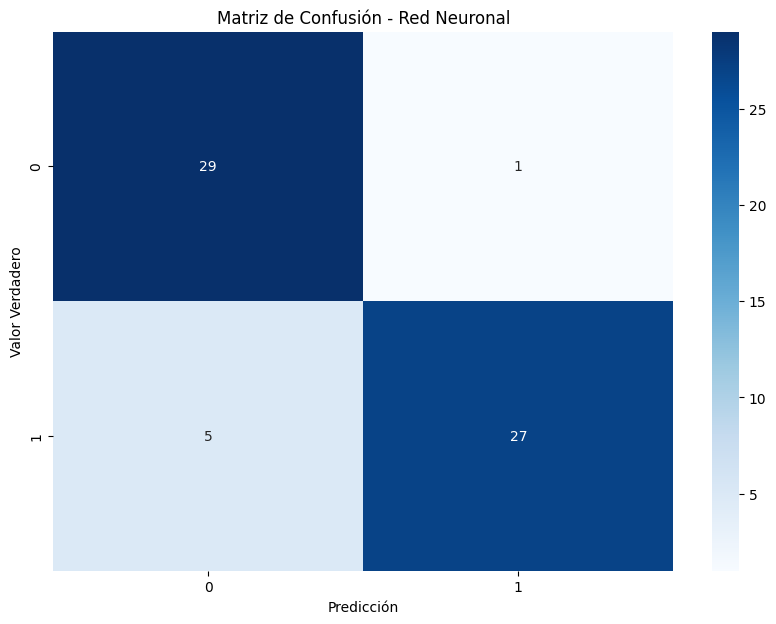

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('/content/drive/My Drive/sms.csv')

# Seleccionar columna Received (mensajes de texto SMS)
df = df[['Received']]

# Eliminar filas con valores nulos en Received
df = df.dropna()

# Definir lista de palabras clave sospechosas
palabras_clave = ['contraseña', 'tarjeta de crédito', 'número de cuenta', 'PIN', 'robo de identidad', 'Cuenta', 'Tarjeta', 'Debito','cambie su contraseña','correo','seguro','peligro','sospechoso', 'hackeo','hackeada','cambie','llame','Datos personales','Información confidencial','Actualización de seguridad','Premio ganado','Oferta especial','Ganador seleccionado','Ganancia inesperada','Cuenta bloqueada','Suspensión de cuenta','Actividad sospechosa','Contraseña expirada' ]

# Etiquetar los mensajes (0: no sospechoso, 1: sospechoso)
def etiquetar_mensaje(texto):
    for palabra in palabras_clave:
        if palabra in texto.lower():
            return 1
    return 0

df['Etiqueta'] = df['Received'].apply(etiquetar_mensaje)

# Verificar la distribución de etiquetas
print(df['Etiqueta'].value_counts())

# Balancear las clases tomando una muestra
sospechosos = df[df['Etiqueta'] == 1]
no_sospechosos = df[df['Etiqueta'] == 0].sample(n=len(sospechosos), random_state=42)

df_balanced = pd.concat([sospechosos, no_sospechosos])

# Verificar la nueva distribución de etiquetas
print(df_balanced['Etiqueta'].value_counts())

# Vectorizar los textos de los mensajes utilizando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_balanced['Received'])
y = df_balanced['Etiqueta']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el clasificador Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Inicializar y entrenar el clasificador Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Inicializar y entrenar la Red Neuronal
nn_classifier = MLPClassifier(max_iter=300)
nn_classifier.fit(X_train, y_train)
y_pred_nn = nn_classifier.predict(X_test)

# Evaluación de modelos
def evaluate_model(y_test, y_pred, model_name):
    print(f"Resultados del modelo {model_name}:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Verdadero")
    plt.show()

# Evaluar el clasificador Naive Bayes
evaluate_model(y_test, y_pred_nb, "Naive Bayes")

# Evaluar el clasificador Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluar la Red Neuronal
evaluate_model(y_test, y_pred_nn, "Red Neuronal")


